In [4]:
import pandas as pd
df = pd.read_csv('../../data/Top Fund Positioning/t10_sp50_weights_20230830.csv')
df['GICS Sector'] = df['GICS Sector'].replace('--','Other')
pattern = r'LION:(.*?)_x_'
df['portfolio'] = df['port_x_bench'].str.extract(pattern, expand=False)
pattern = r'BENCH:(.*)'
df['bench'] =  df['port_x_bench'].str.extract(pattern, expand=False)
df["Asset Type+(Client Definition/+FactSet)"]= df["Asset Type+(Client Definition/+FactSet)"].replace('--','Other')
df[['Port.+Weight','Bench.+Weight','Difference']] = df[['Port.+Weight','Bench.+Weight','Difference']].fillna(0)


df.head()

,Unnamed: 0,Symbol,security0,Ticker-Region,GICS Sector,GICS Industry Name,GICS Industry Group,GICS Sub Industry,Region of Domicile,MSCI Country,...,Port.+Shares,Port.+Weight,Bench.+Shares,Bench.+Weight,Difference,Asset Type+(Client Definition/+FactSet),Asset Class+(Client Definition/+FactSet),port_x_bench,portfolio,bench
0,0,88579Y101,3M Company,MMM-US,Industrials,Industrial Conglomerates,Capital Goods,Industrial Conglomerates,North America,United States,...,1075142.0,0.159586,551.672,0.160497,-0.000911,Equity Common,Equity,LION:SWPPX-US_x_BENCH:SP50,SWPPX-US,SP50
1,1,831865209,A. O. Smith Corporation,AOS-US,Industrials,Building Products,Capital Goods,Building Products,North America,United States,...,244991.0,0.023688,124.538,0.023601,0.000087,Equity Common,Equity,LION:SWPPX-US_x_BENCH:SP50,SWPPX-US,SP50
2,2,002824100,Abbott Laboratories,ABT-US,Health Care,Health Care Equipment & Supplies,Health Care Equipment & Services,Health Care Equipment,North America,United States,...,3393718.0,0.502970,1738.947,0.505137,-0.002167,Equity Common,Equity,LION:SWPPX-US_x_BENCH:SP50,SWPPX-US,SP50
3,3,00287Y109,"AbbVie, Inc.",ABBV-US,Health Care,Biotechnology,Pharmaceuticals Biotechnology & Life Sciences,Biotechnology,North America,United States,...,3443178.0,0.685626,1764.290,0.688580,-0.002954,Equity Common,Equity,LION:SWPPX-US_x_BENCH:SP50,SWPPX-US,SP50
4,4,B4BNMY3,Accenture Plc Class A,ACN-US,Information Technology,IT Services,Software & Services,It Consulting & Other Services,North America,United States,...,1232494.0,0.519047,631.532,0.521284,-0.002236,Equity Common,Equity,LION:SWPPX-US_x_BENCH:SP50,SWPPX-US,SP50


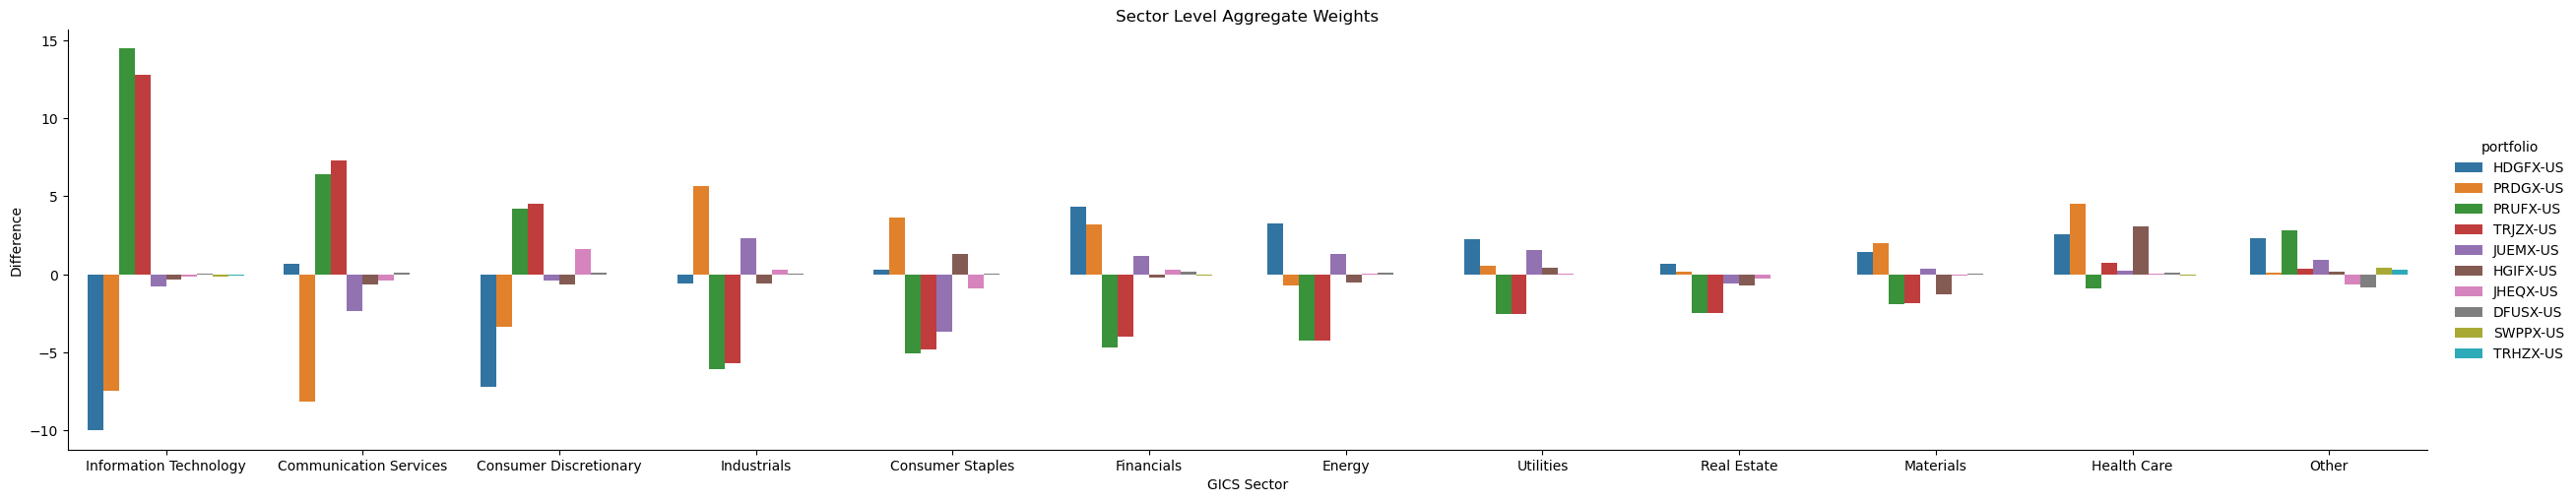

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_plot =df.groupby(['portfolio','GICS Sector']).agg({'Difference':'sum'}).sort_values('Difference')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Difference',
            hue = 'portfolio',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Sector Level Aggregate Weights')



plt.show()

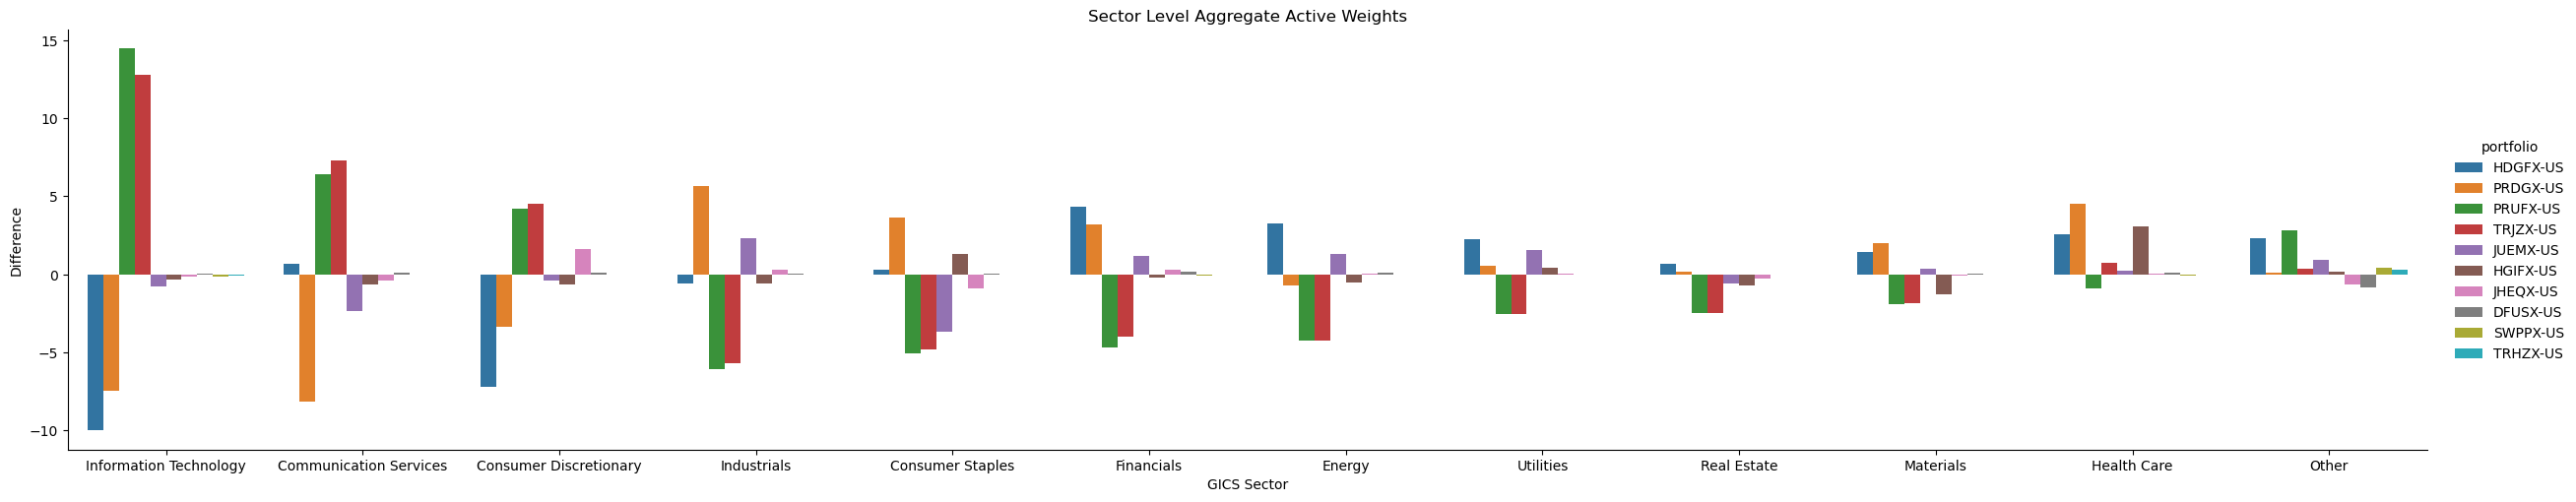

In [47]:
sns.catplot(data=df.groupby(['portfolio','GICS Sector']).agg({'Difference':'sum'}).sort_values('Difference').reset_index(),
            x = 'GICS Sector',
            y = 'Difference',
            hue = 'portfolio',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Sector Level Aggregate Active Weights')

plt.show()

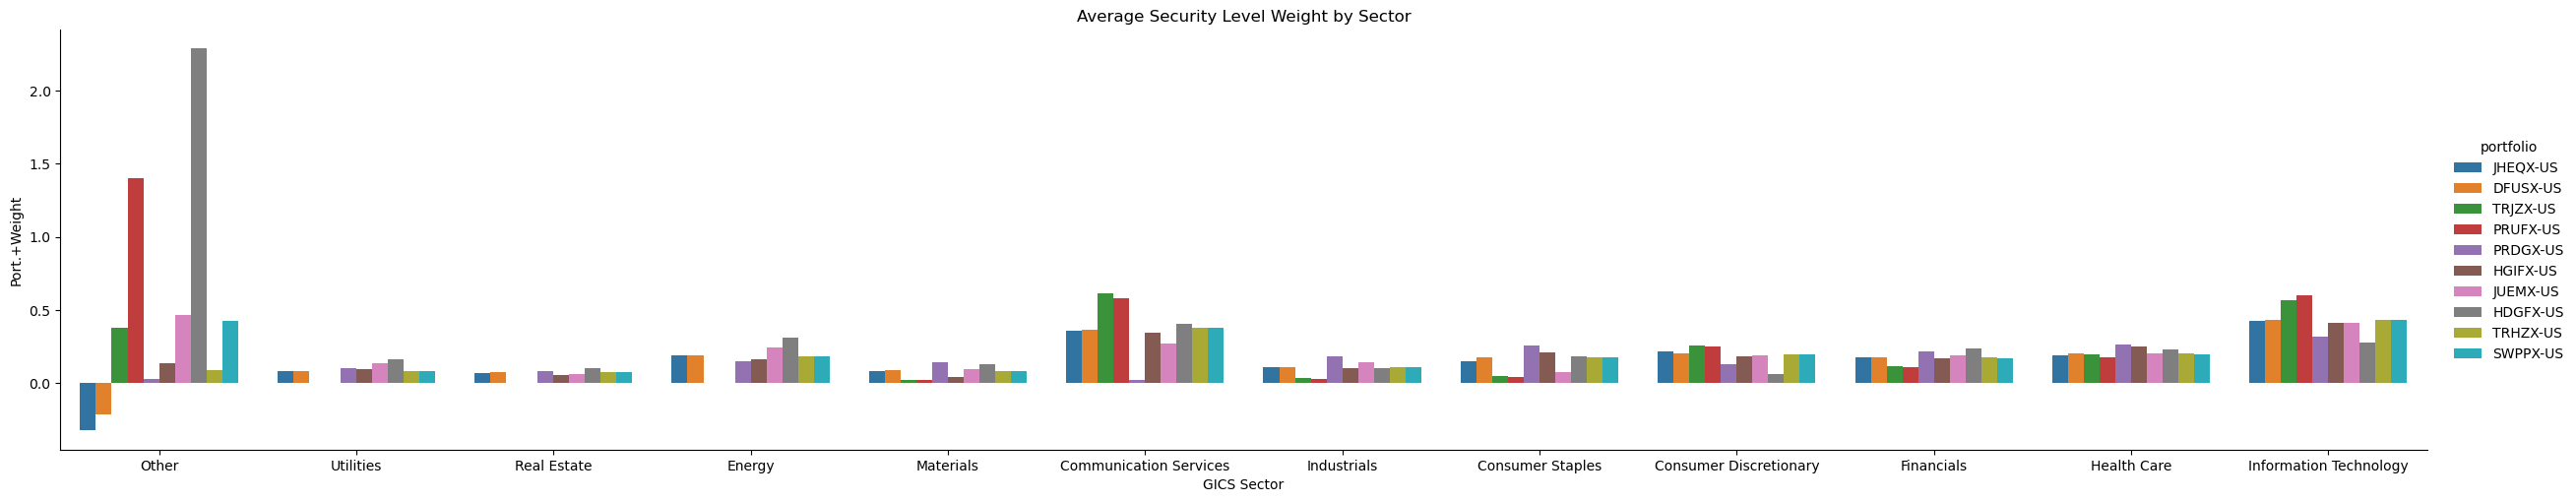

In [45]:
df_plot =df.groupby(['portfolio','GICS Sector']).agg({'Port.+Weight':'mean'}).sort_values('Port.+Weight')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Port.+Weight',
            hue = 'portfolio',  
            kind = 'bar',
            aspect = 5
            )
plt.title('Average Security Level Weight by Sector')
plt.show()

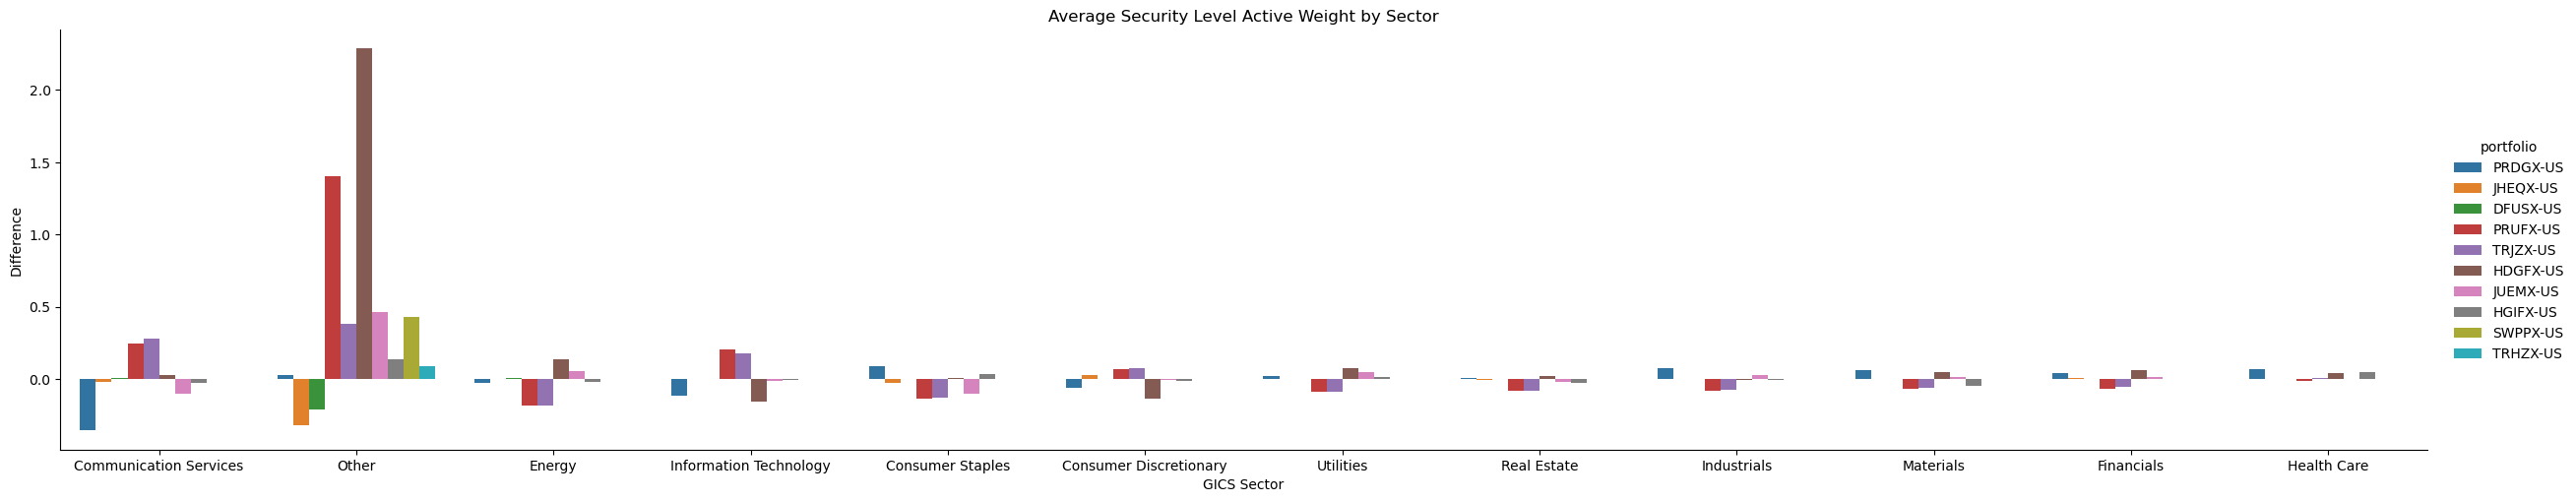

In [44]:
df_plot =df.groupby(['portfolio','GICS Sector']).agg({'Difference':'mean'}).sort_values('Difference')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Difference',
            hue = 'portfolio',  
            kind = 'bar',
            aspect = 5
            )
plt.title('Average Security Level Active Weight by Sector')
plt.show()

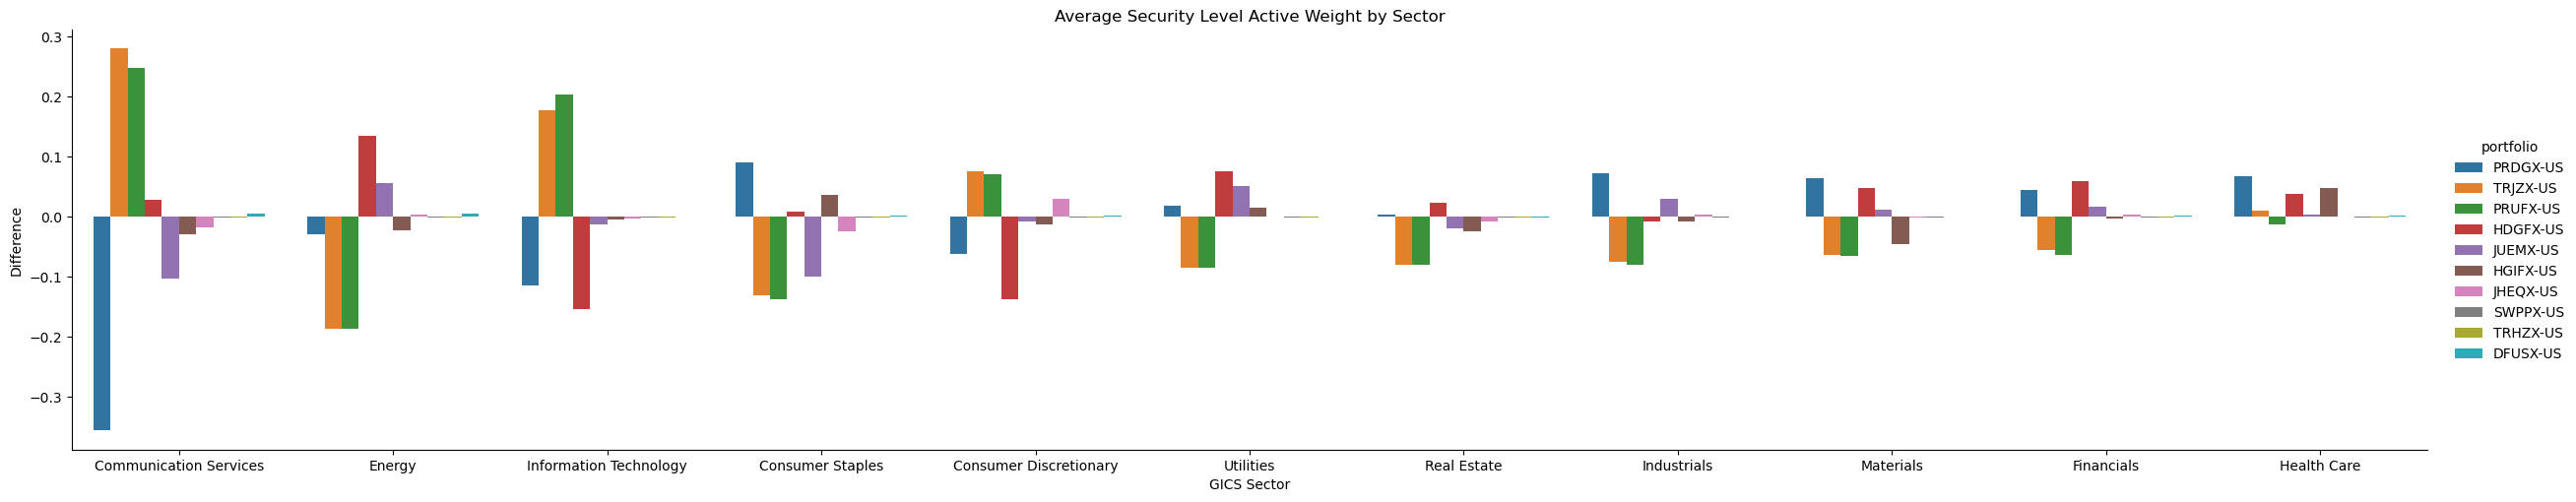

In [43]:
df_plot =df[df['GICS Sector']!='Other'].groupby(['portfolio','GICS Sector']).agg({'Difference':'mean'}).sort_values('Difference')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Difference',
            hue = 'portfolio',  
            kind = 'bar',
            aspect = 5
            )
plt.title('Average Security Level Active Weight by Sector')
plt.show()

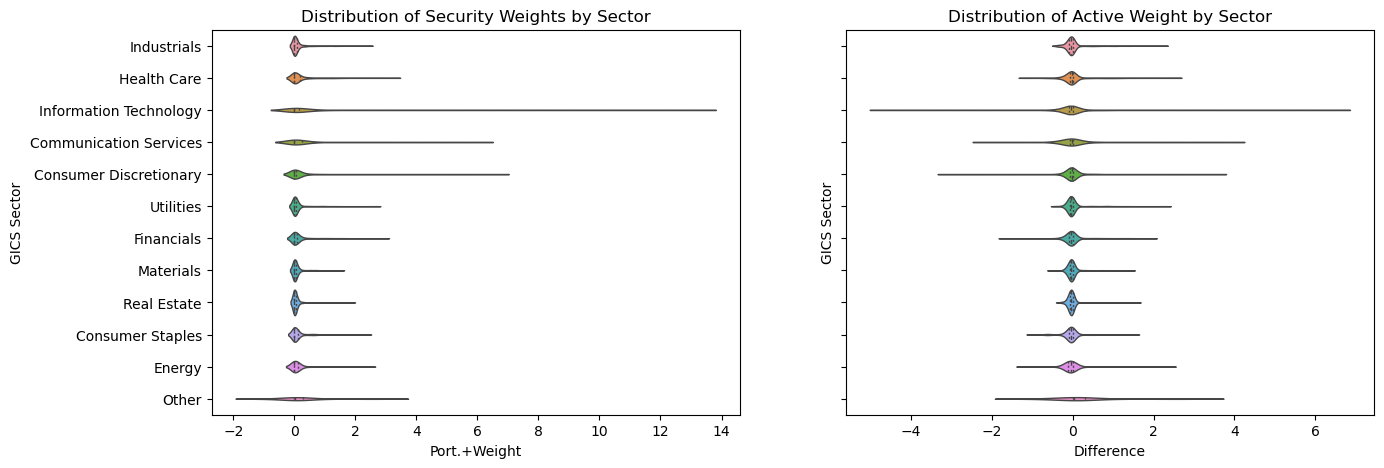

In [39]:
# Draw a nested violinplot and split the violins for easier comparison
fig,axs = plt.subplots(1,2,figsize=(15,5),sharey=True)

sns.violinplot(data=df.reset_index(), y="GICS Sector", x="Port.+Weight",
               inner="quart", linewidth=1,orient ='h',ax=axs[0])
axs[0].set_title("Distribution of Security Weights by Sector")

sns.violinplot(data=df.reset_index(), y="GICS Sector", x="Difference",
               inner="quart", linewidth=1,orient ='h',ax=axs[1])
axs[1].set_title("Distribution of Active Weight by Sector")
plt.show()

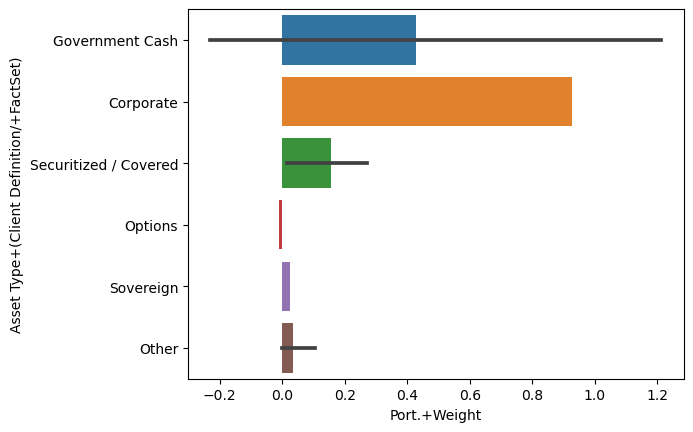

In [38]:

sns.barplot(data=df[df['GICS Sector']=='Other'], y="Asset Type+(Client Definition/+FactSet)", x="Port.+Weight")

plt.show()

In [40]:
df[df['Port.+Weight']>6].groupby(['portfolio','Ticker-Region']).agg({'Symbol':'count','Port.+Weight':'sum'})

Symbol  Port.+Weight
portfolio Ticker-Region                      
DFUSX-US  AAPL-US             1      7.681552
          MSFT-US             1      6.574196
HDGFX-US  MSFT-US             1      6.520108
HGIFX-US  AAPL-US             1      6.681734
          MSFT-US             1      6.571493
JHEQX-US  AAPL-US             1      7.677638
          MSFT-US             1      6.944228
JUEMX-US  MSFT-US             1      9.057733
PRUFX-US  AAPL-US             1     10.338386
          AMZN-US             1      6.678039
          MSFT-US             1     13.045171
          NVDA-US             1      6.243352
SWPPX-US  AAPL-US             1      7.546197
          MSFT-US             1      6.489171
TRHZX-US  AAPL-US             1      7.560030
          MSFT-US             1      6.501253
TRJZX-US  AAPL-US             1      7.740621
          AMZN-US             1      6.099719
          MSFT-US             1     12.260943
          NVDA-US             1      6.360154

In [41]:
df.sort_values('Port.+Weight',ascending =False).dropna().head(10)[['portfolio','Ticker-Region','Port.+Weight','Bench.+Weight']]

,portfolio,Ticker-Region,Port.+Weight,Bench.+Weight
2377,PRUFX-US,MSFT-US,13.045171,6.517127
833,TRJZX-US,MSFT-US,12.260943,6.517127
2090,PRUFX-US,AAPL-US,10.338386,7.578507
1860,JUEMX-US,MSFT-US,9.057733,6.517127
546,TRJZX-US,AAPL-US,7.740621,7.578507
4156,DFUSX-US,AAPL-US,7.681552,7.578507
2616,JHEQX-US,AAPL-US,7.677638,7.578507
3133,TRHZX-US,AAPL-US,7.560030,7.578507
41,SWPPX-US,AAPL-US,7.546197,7.578507
2899,JHEQX-US,MSFT-US,6.944228,6.517127


<Axes: xlabel='Port.+Weight', ylabel='Bench.+Weight'>

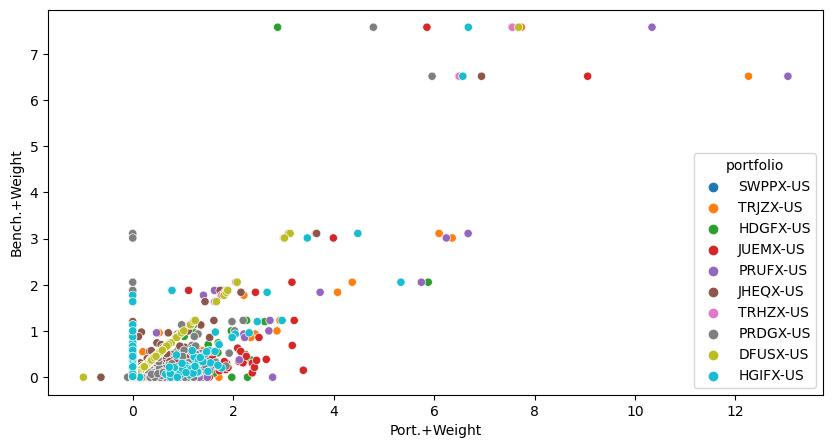

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data = df,x = 'Port.+Weight',y='Bench.+Weight',hue = 'portfolio')